<a href="https://colab.research.google.com/github/Eman-Adly/projects-NTI/blob/main/check_dentical_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!ls '/content/drive/MyDrive/Colab Notebooks/dentical'

dentical_model.h5  themodel.h5


In [3]:
from __future__ import absolute_import, print_function, division, unicode_literals

In [4]:
import tensorflow as tf

In [7]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/dentical/dentical_model.h5')
print(model.outputs)

[<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_323>]


In [8]:
print(model.inputs)

[<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=input_layer>]


In [9]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,422,083 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2 (12.00 B)

In [10]:
from PIL import Image
import numpy as np

In [11]:
def scale(image):
  image=tf.cast(image,tf.float32)
  image/=255.0
  return tf.image.resize(image,[224,224])

In [12]:
def decode_img(img):
  img=tf.io.read_file(img)
  img=tf.image.decode_jpeg(img,channels=3)
  img=scale(img)
  return np.expand_dims(img,axis=0)

In [13]:
classes=['cavity','healthy']

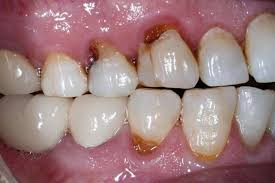

In [16]:
Image.open('/content/drive/MyDrive/Colab Notebooks/image/images.jpg')

In [18]:
y_pred_probs = model.predict(decode_img('/content/drive/MyDrive/Colab Notebooks/image/images.jpg'))

y_pred = (y_pred_probs > 0.5).astype(int).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [19]:
classes[y_pred[0]]

'cavity'

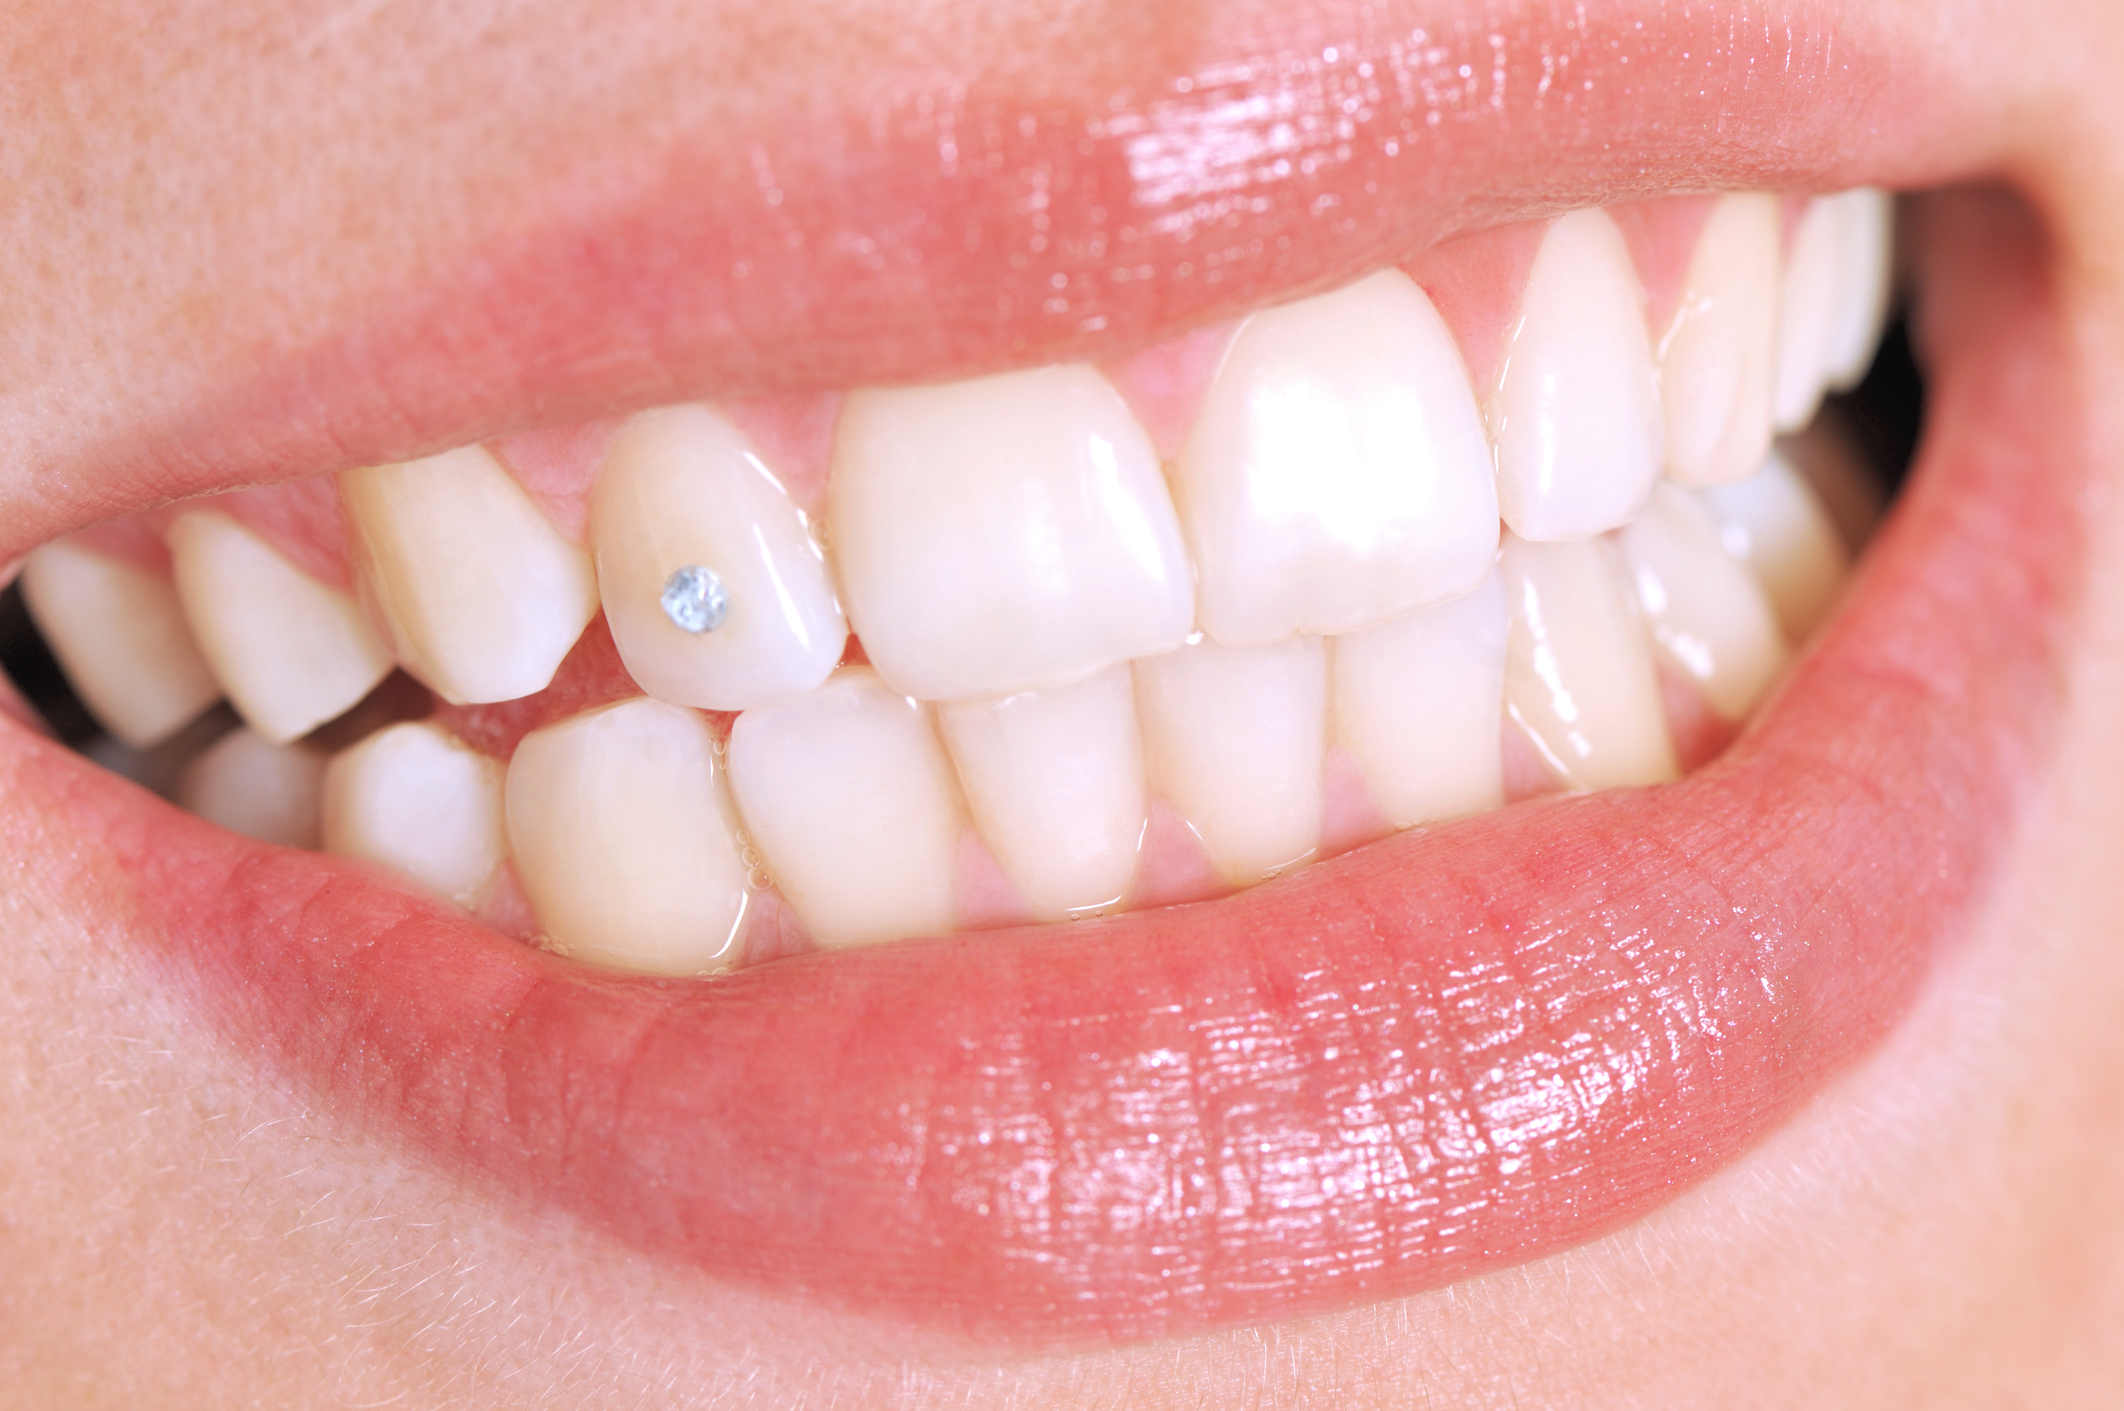

In [20]:
Image.open('/content/drive/MyDrive/Colab Notebooks/image/GettyImages-149215516-tooth gem.jpg')

In [21]:
y_pred_probs = model.predict(decode_img('/content/drive/MyDrive/Colab Notebooks/image/GettyImages-149215516-tooth gem.jpg'))

y_pred = (y_pred_probs > 0.5).astype(int).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [22]:
classes[y_pred[0]]

'healthy'

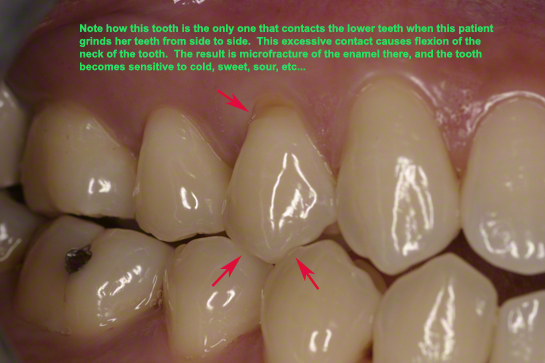

In [23]:
Image.open('/content/drive/MyDrive/Colab Notebooks/image/blog-alexnguyendds-abfraction2-img_57291.jpg')

In [24]:
y_pred_probs = model.predict(decode_img('/content/drive/MyDrive/Colab Notebooks/image/blog-alexnguyendds-abfraction2-img_57291.jpg'))

y_pred = (y_pred_probs > 0.5).astype(int).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [25]:
classes[y_pred[0]]

'cavity'

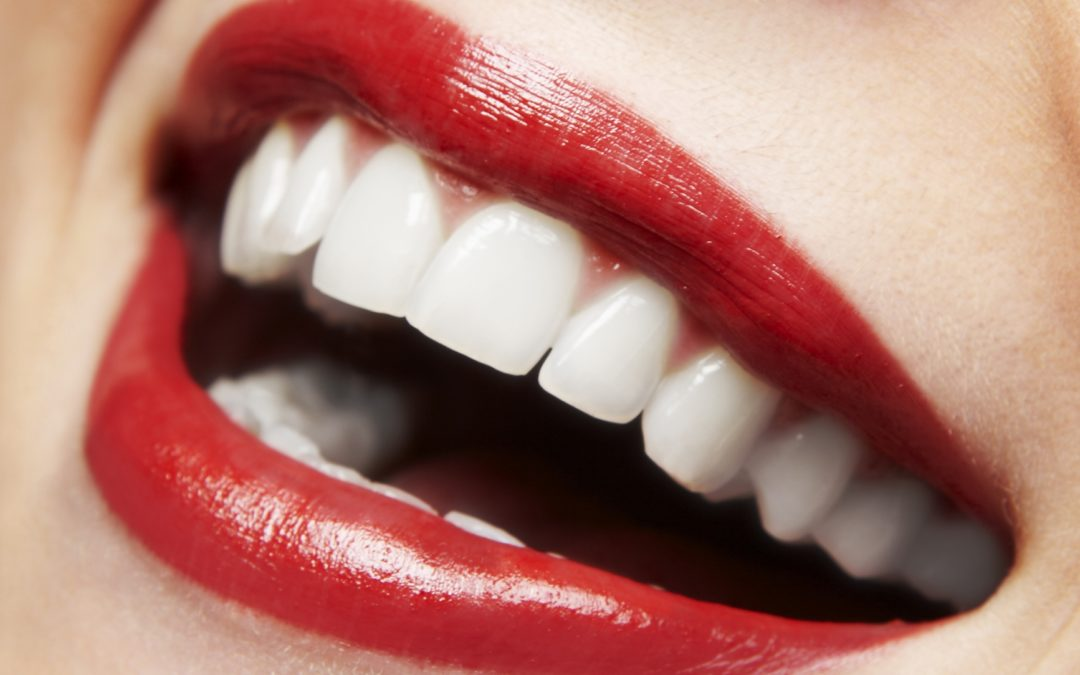

In [26]:
Image.open('/content/drive/MyDrive/Colab Notebooks/image/close-up-smile-red-lipstick-1080x675.jpg')

In [27]:
y_pred_probs = model.predict(decode_img('/content/drive/MyDrive/Colab Notebooks/image/close-up-smile-red-lipstick-1080x675.jpg'))

y_pred = (y_pred_probs > 0.5).astype(int).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [28]:
classes[y_pred[0]]

'healthy'